In [1]:
import kagglehub
vjchoudhary7_customer_segmentation_tutorial_in_python_path = kagglehub.dataset_download('vjchoudhary7/customer-segmentation-tutorial-in-python')

print('Data source import complete.')

100%|██████████| 1.55k/1.55k [00:00<00:00, 2.69MB/s]

Extracting files...
Data source import complete.


# Customer Segmentation and Analysis
### Steps to solve the problem :
1. Importing Libraries.
2. Exploration of data.
3. Data Visualization.
4. Clustering using K-Means.
5. Selection of Clusters.
6. Ploting the Cluster Boundry and Clusters.
7. 3D Plot of Clusters.

## Importing Libraries and Adjusting Settings and Assigning Values

In [28]:
import numpy as np
import pandas as pd

import sweetviz as sv

import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

from sklearn.cluster import KMeans

import warnings
import os

plt.style.use('fivethirtyeight')

warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

## Data Exploration

In [10]:
# Check the path to see what files were downloaded
data = os.listdir(vjchoudhary7_customer_segmentation_tutorial_in_python_path)

# Assuming there's a CSV file in the downloaded dataset
file_path = os.path.join(vjchoudhary7_customer_segmentation_tutorial_in_python_path, data[0])
df = pd.read_csv(file_path)

# Preview the data
df.sample(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
99,100,Male,20,61,49
186,187,Female,54,101,24


                                             |          | [  0%]   00:00 -> (? left)


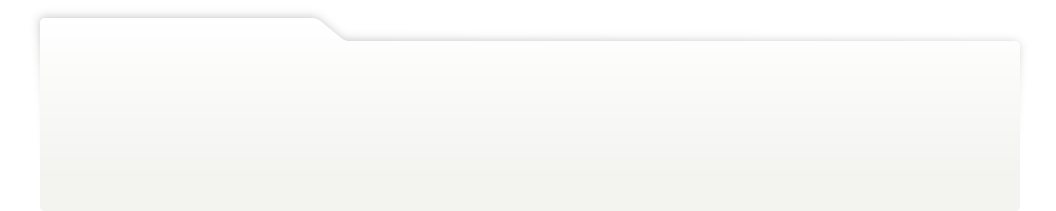
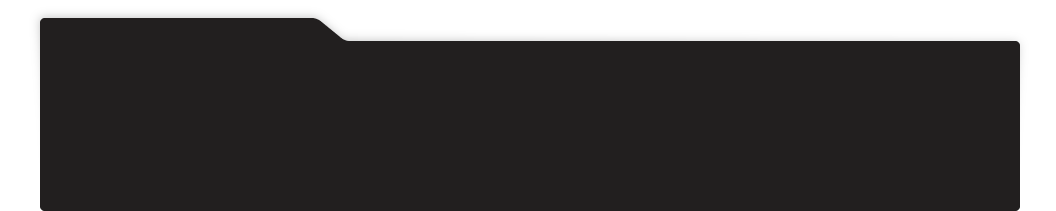
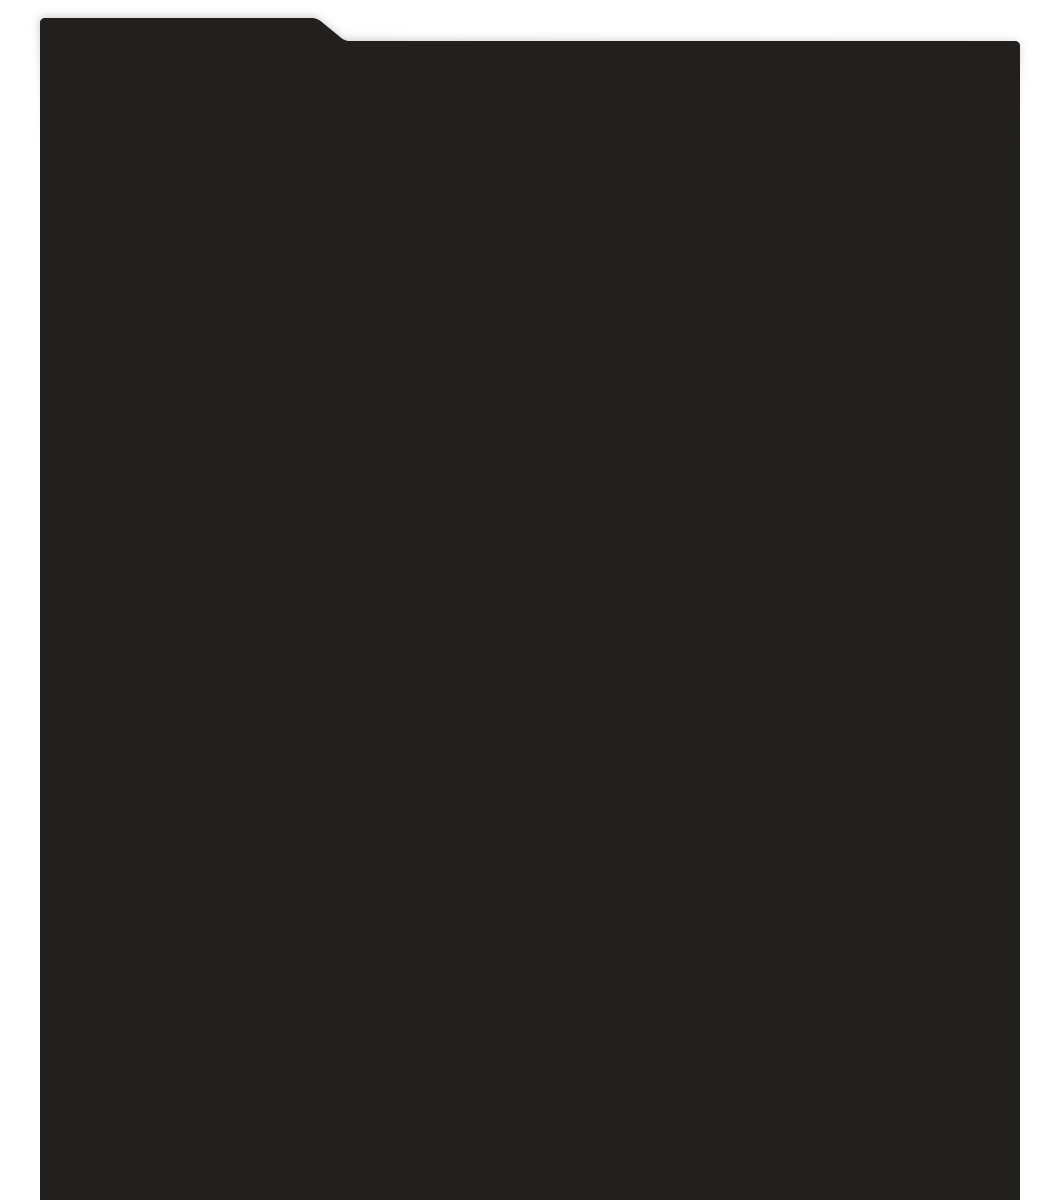
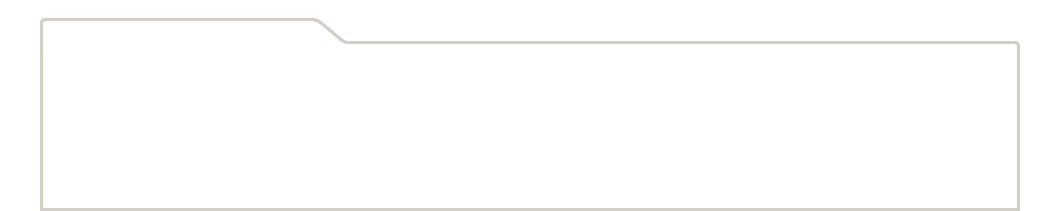
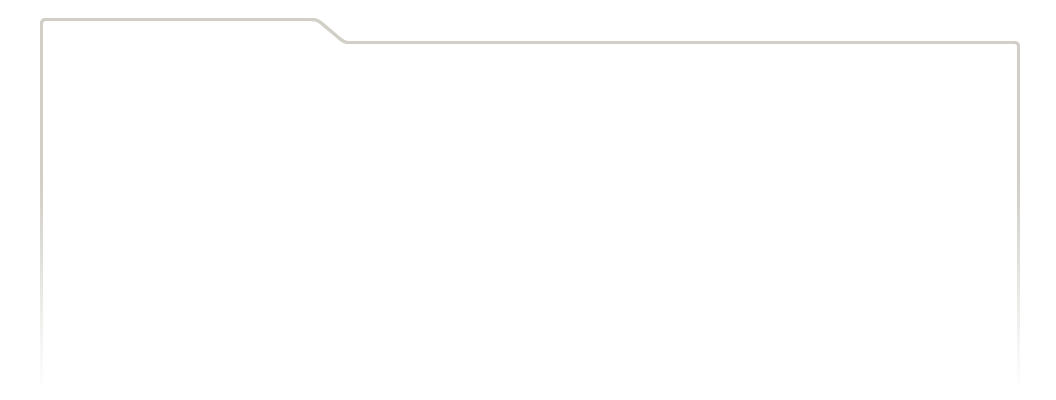
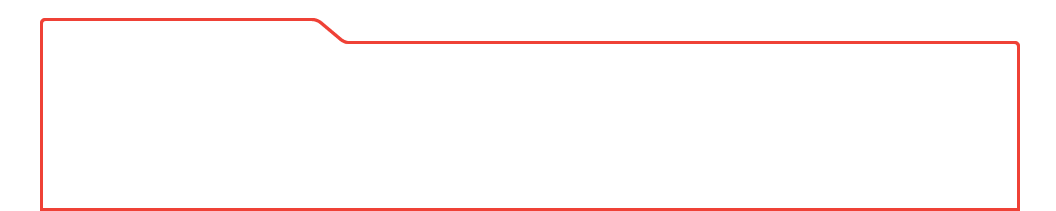
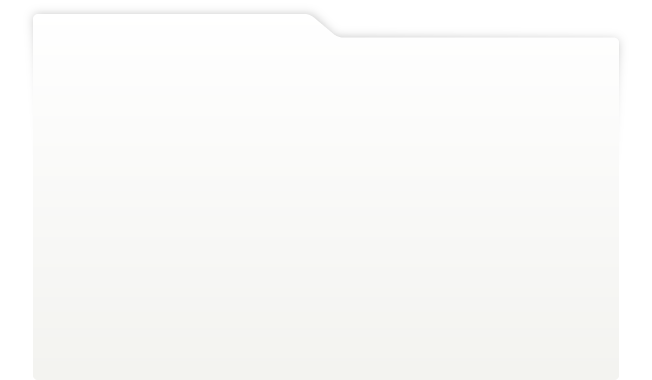
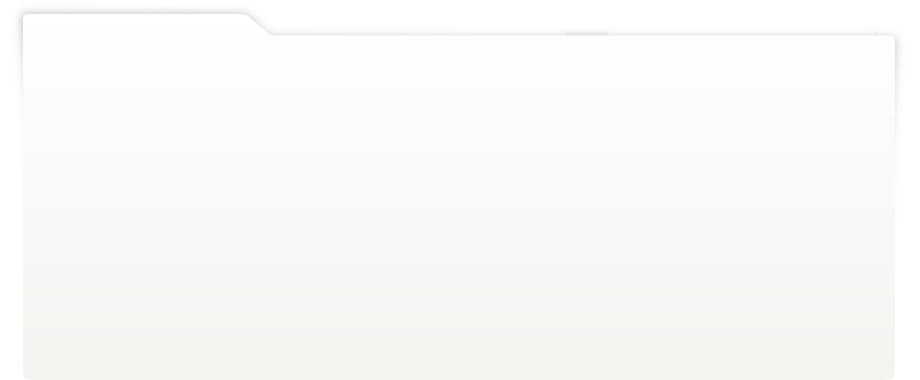
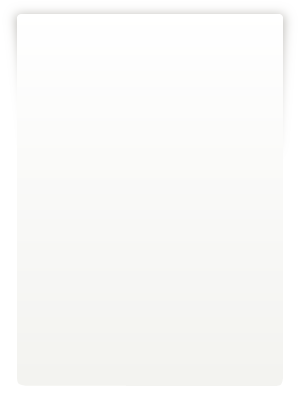
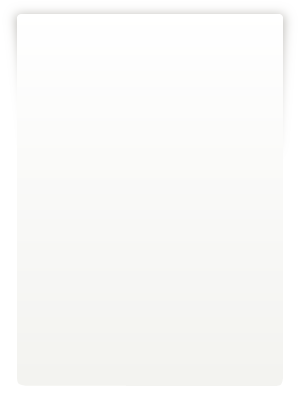
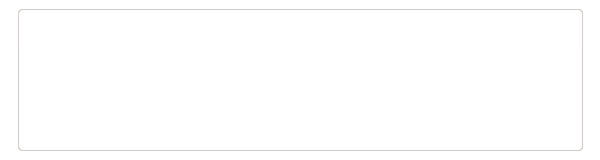
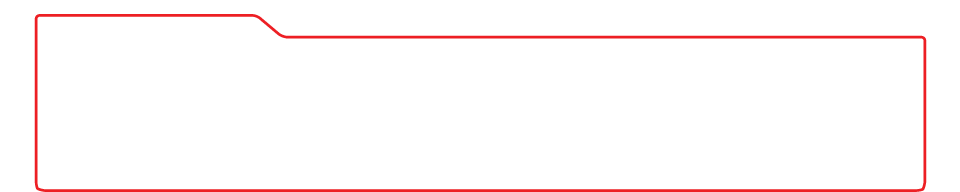
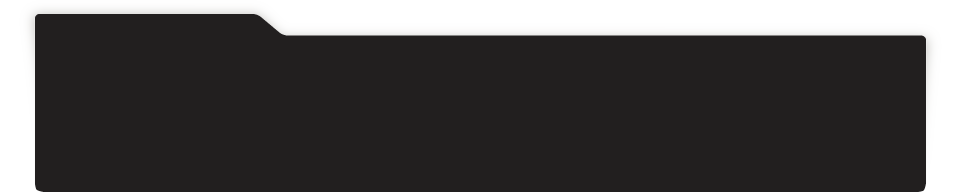
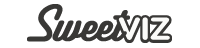
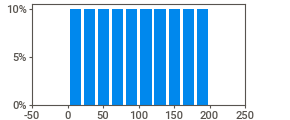
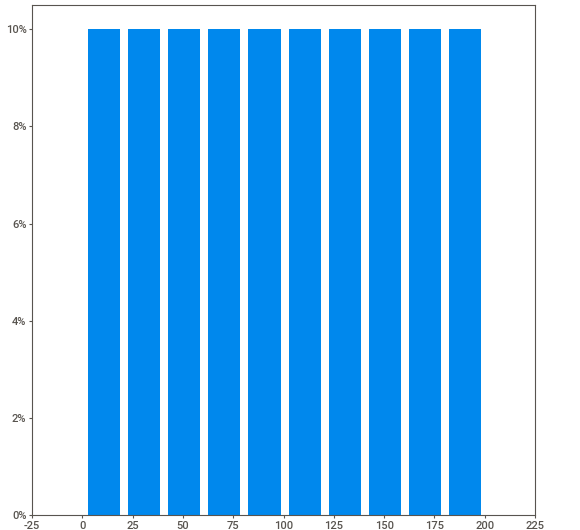
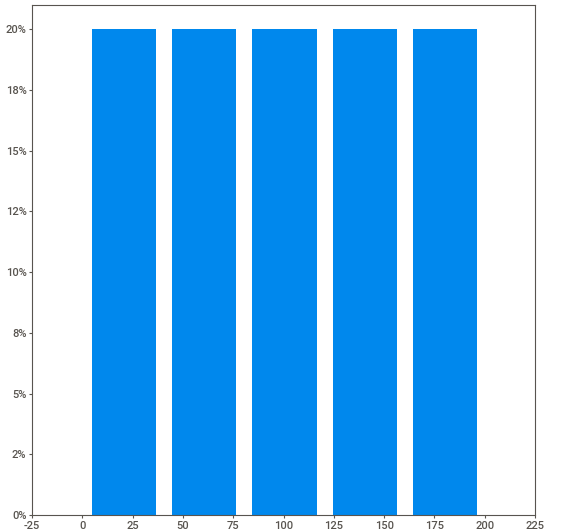
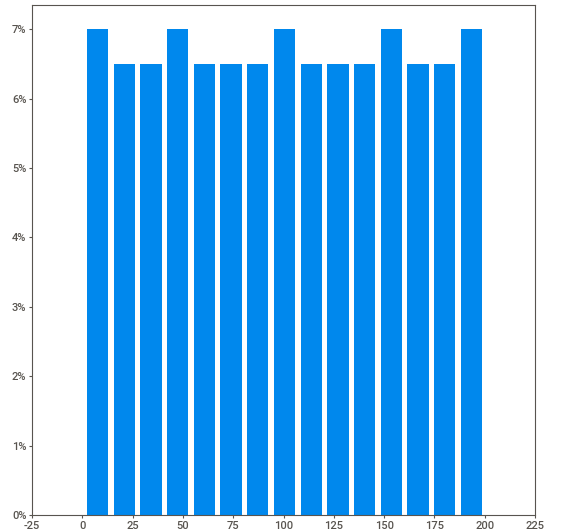
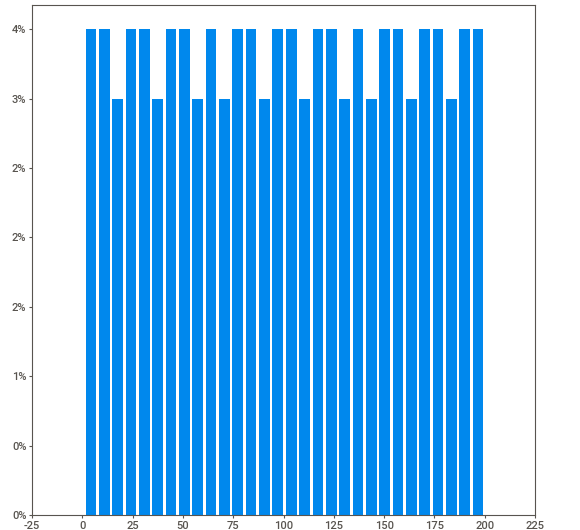
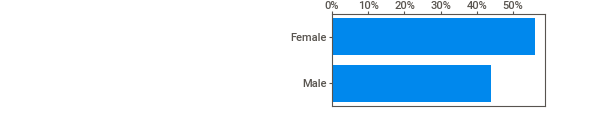
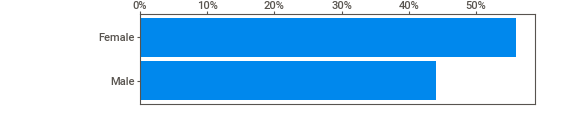
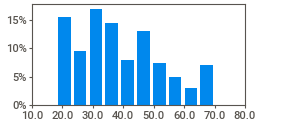
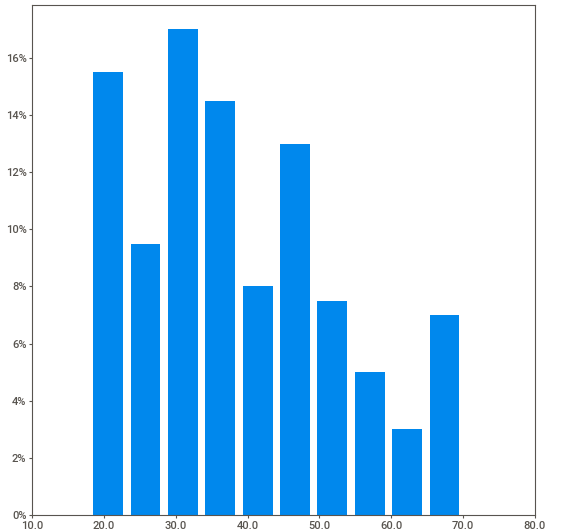
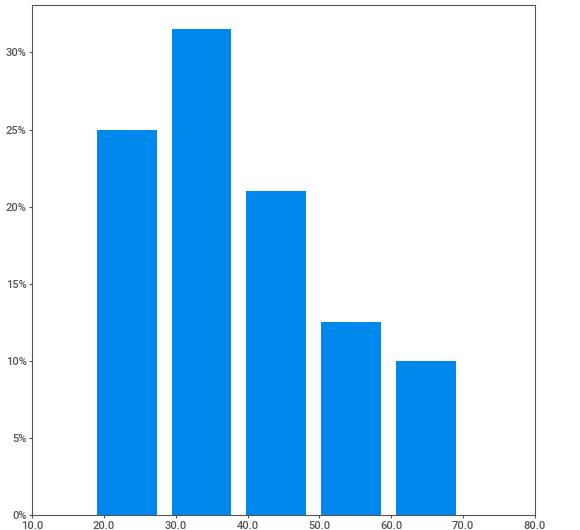
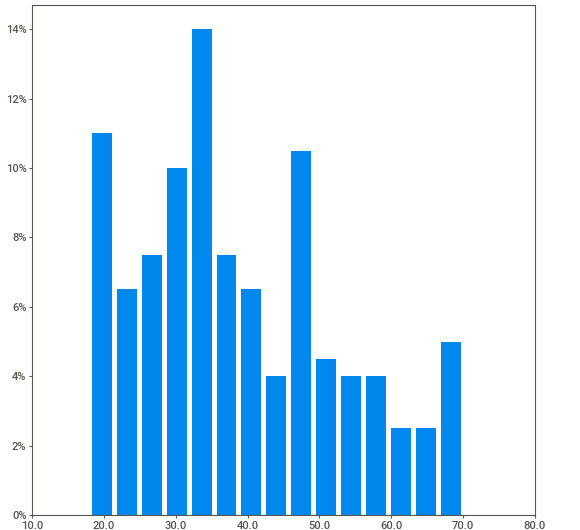
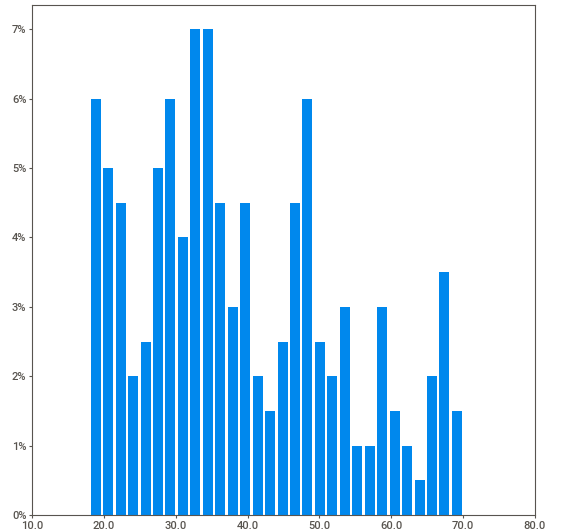
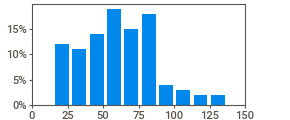
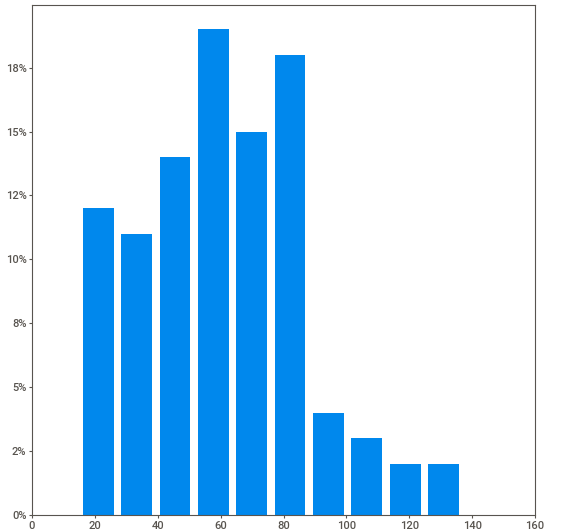
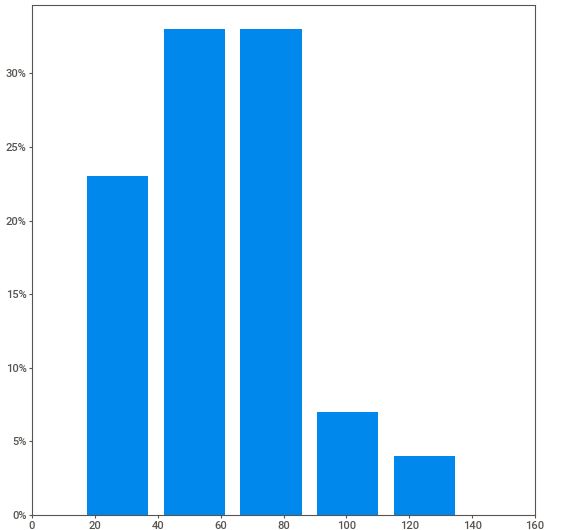
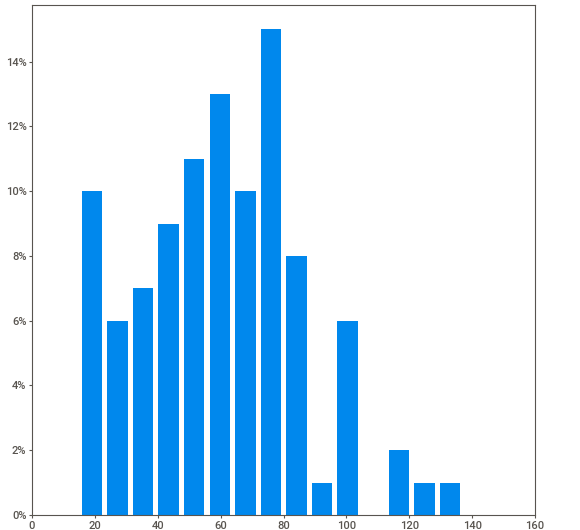
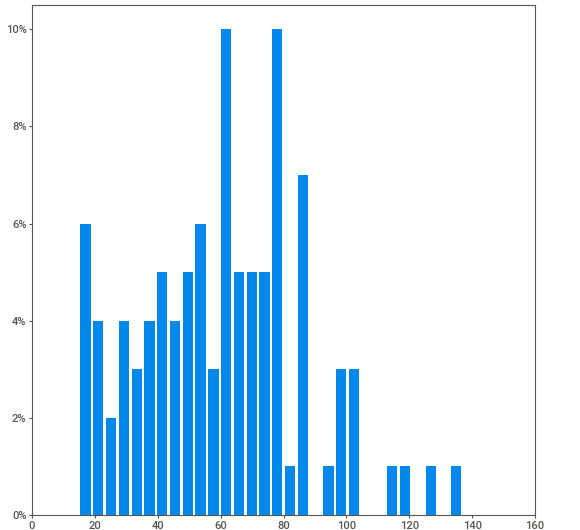
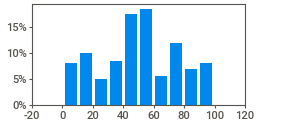
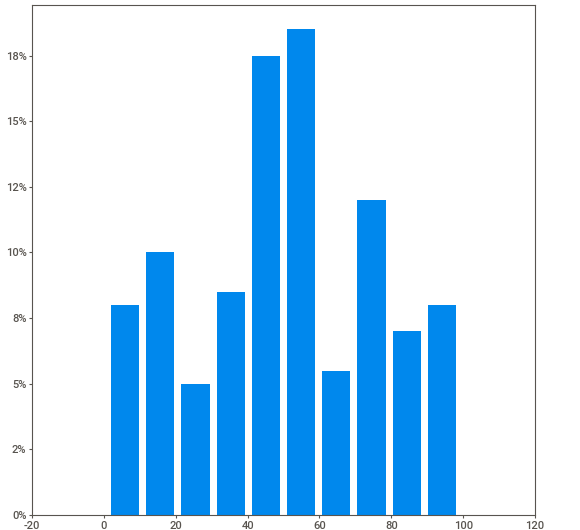
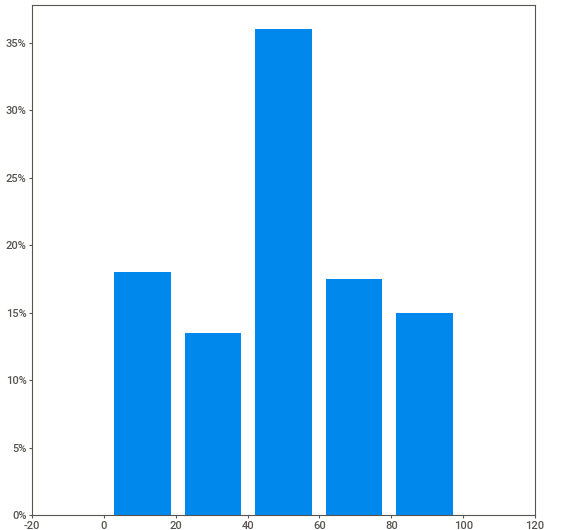
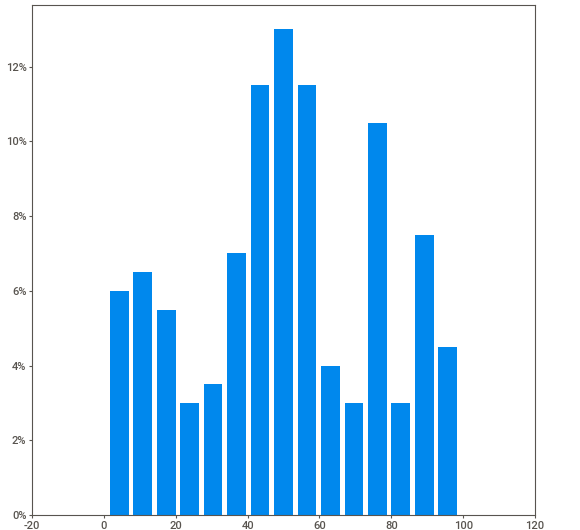
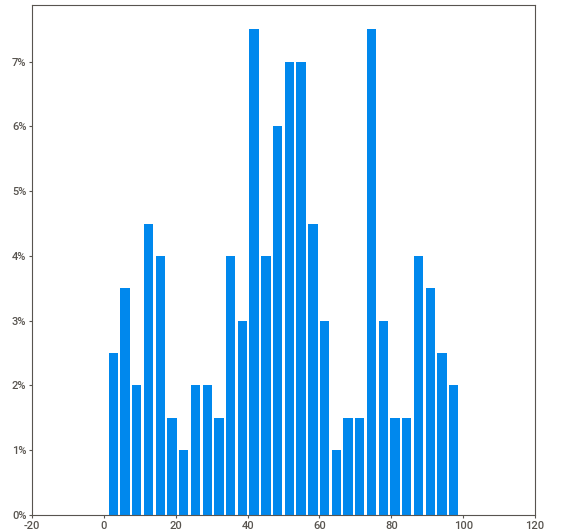
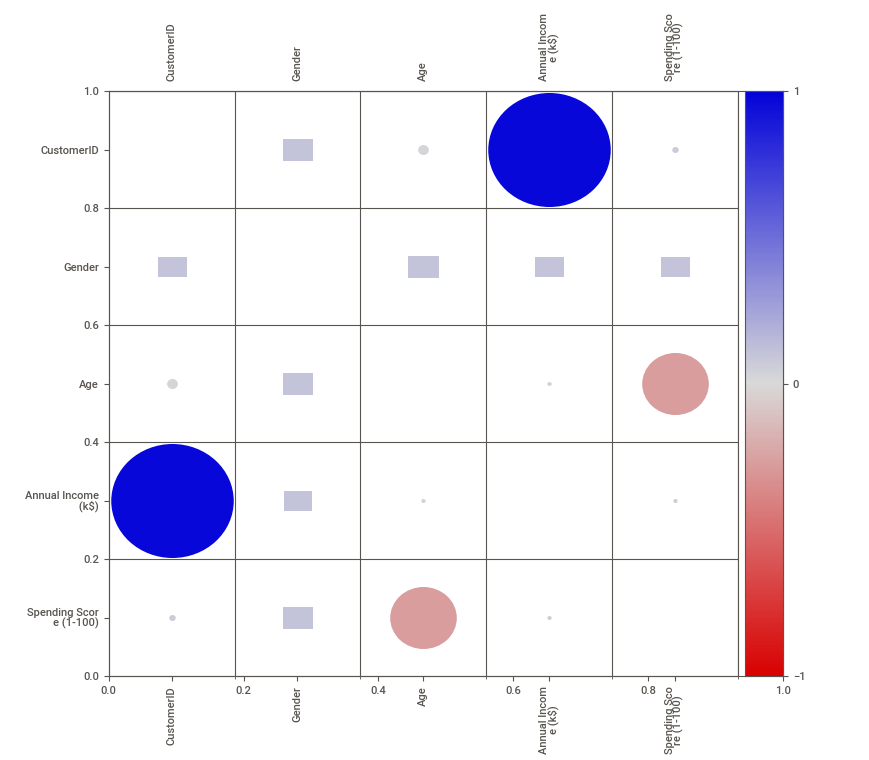
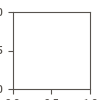

In [26]:
# create initial exploration reporting and show
report = sv.analyze(df)
report.show_notebook()

## Data Visualization

### Histograms

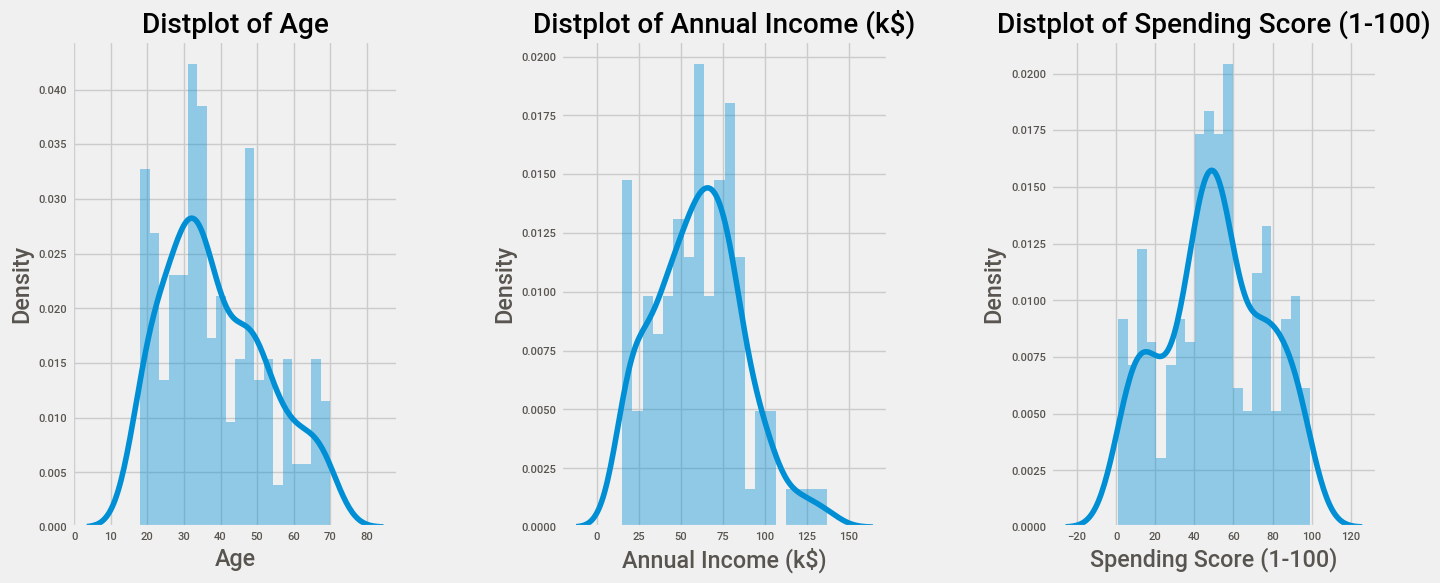

In [29]:
plt.figure(1 , figsize = (15 , 6))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

### Count Plot of Gender

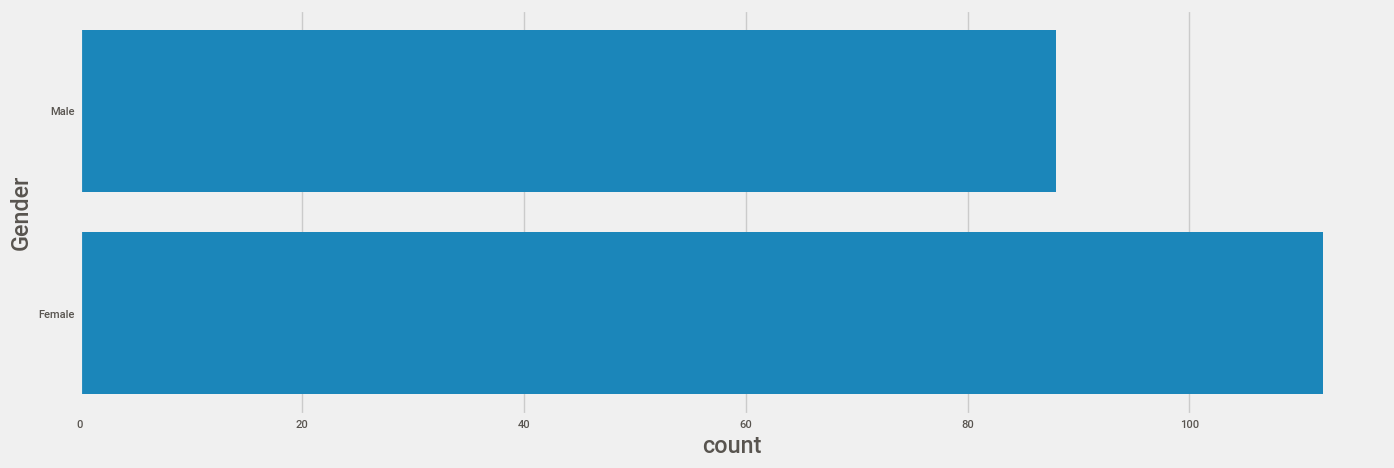

In [30]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

### Ploting the Relation between Age , Annual Income and Spending Score

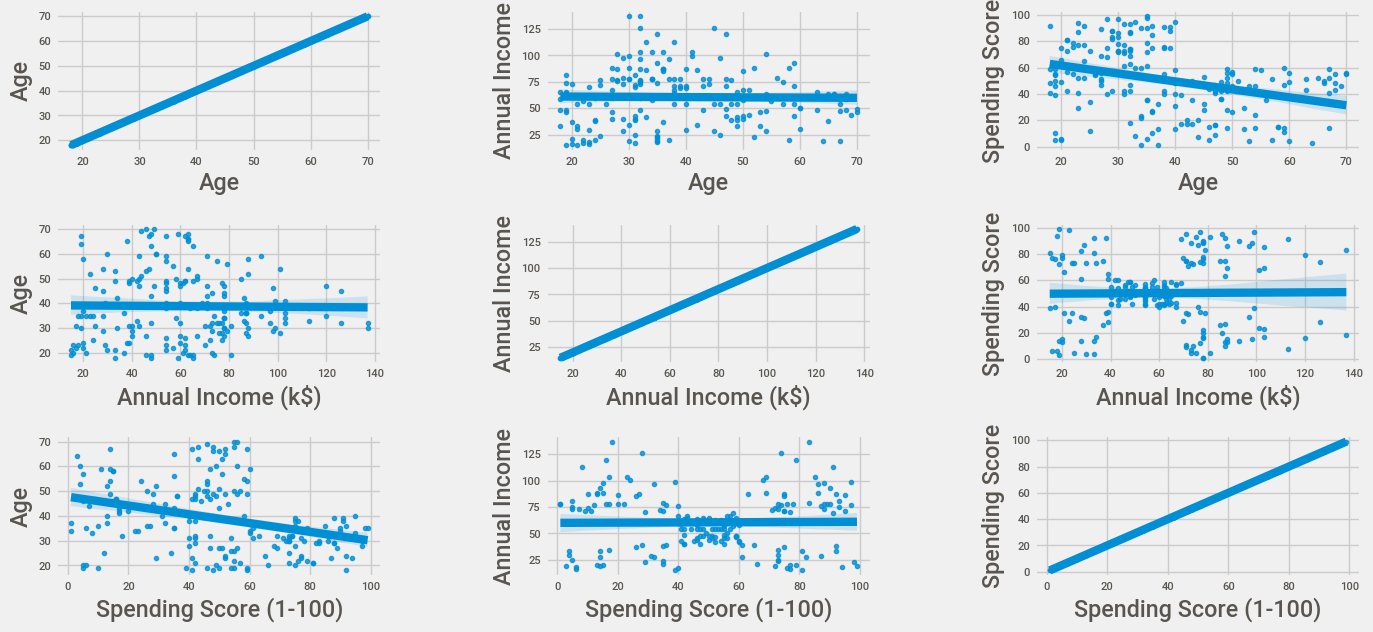

In [31]:
plt.figure(1 , figsize = (15 , 7))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

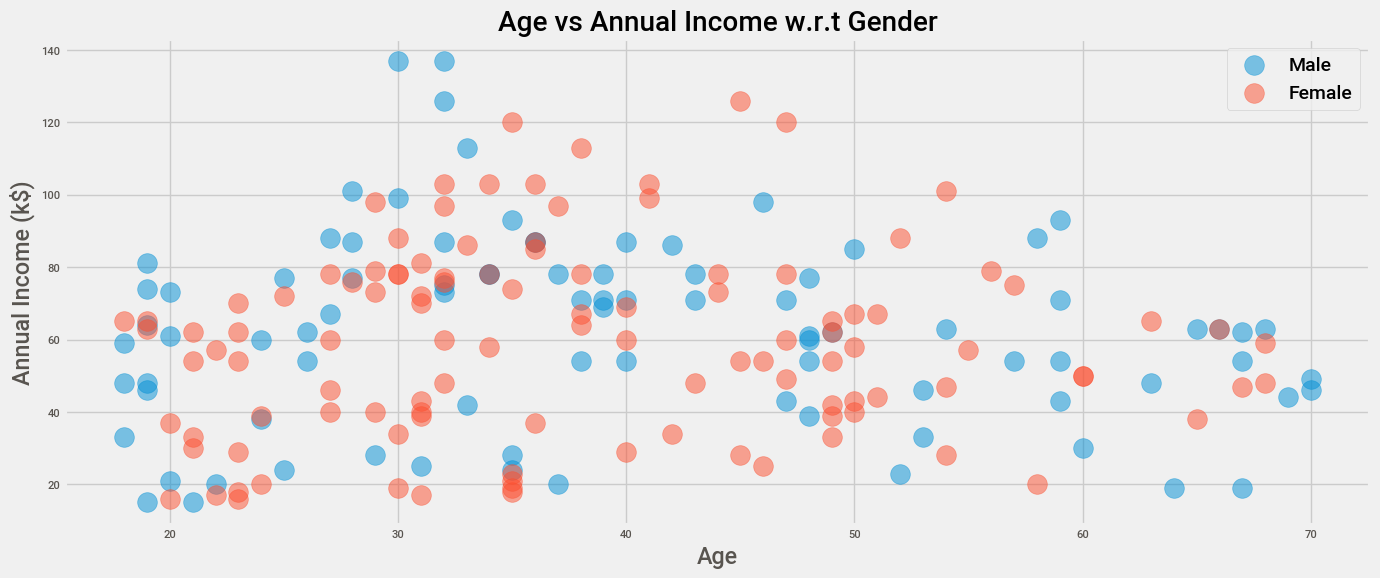

In [32]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

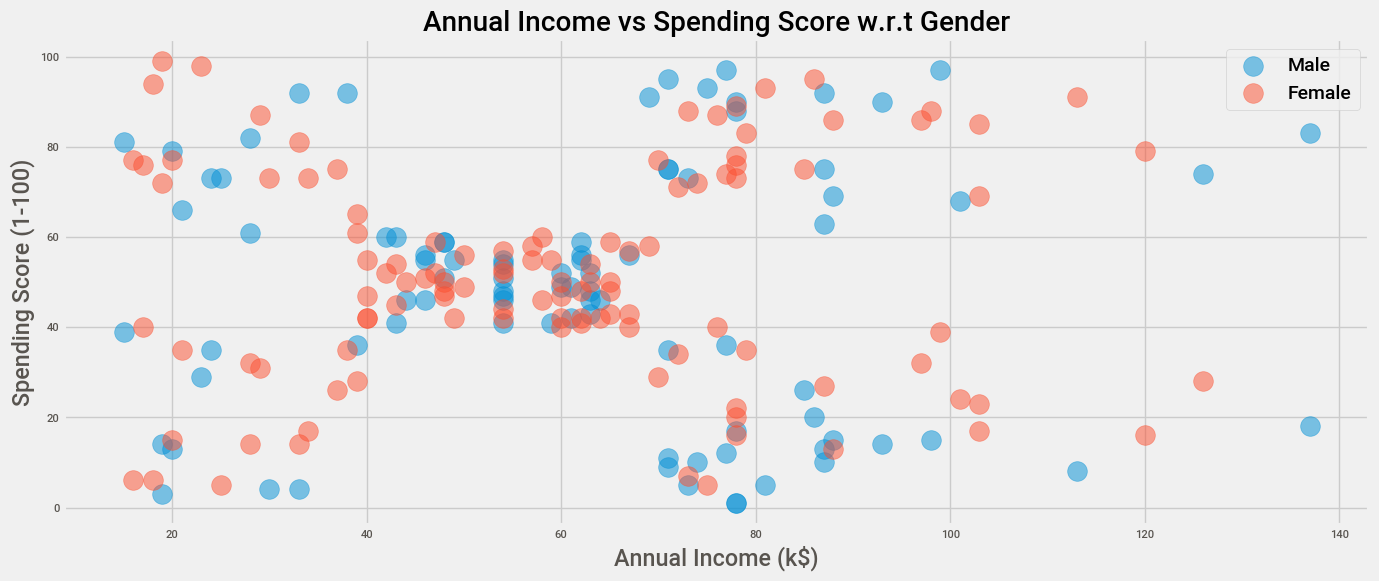

In [33]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

### Distribution of values in Age , Annual Income and Spending Score according to Gender

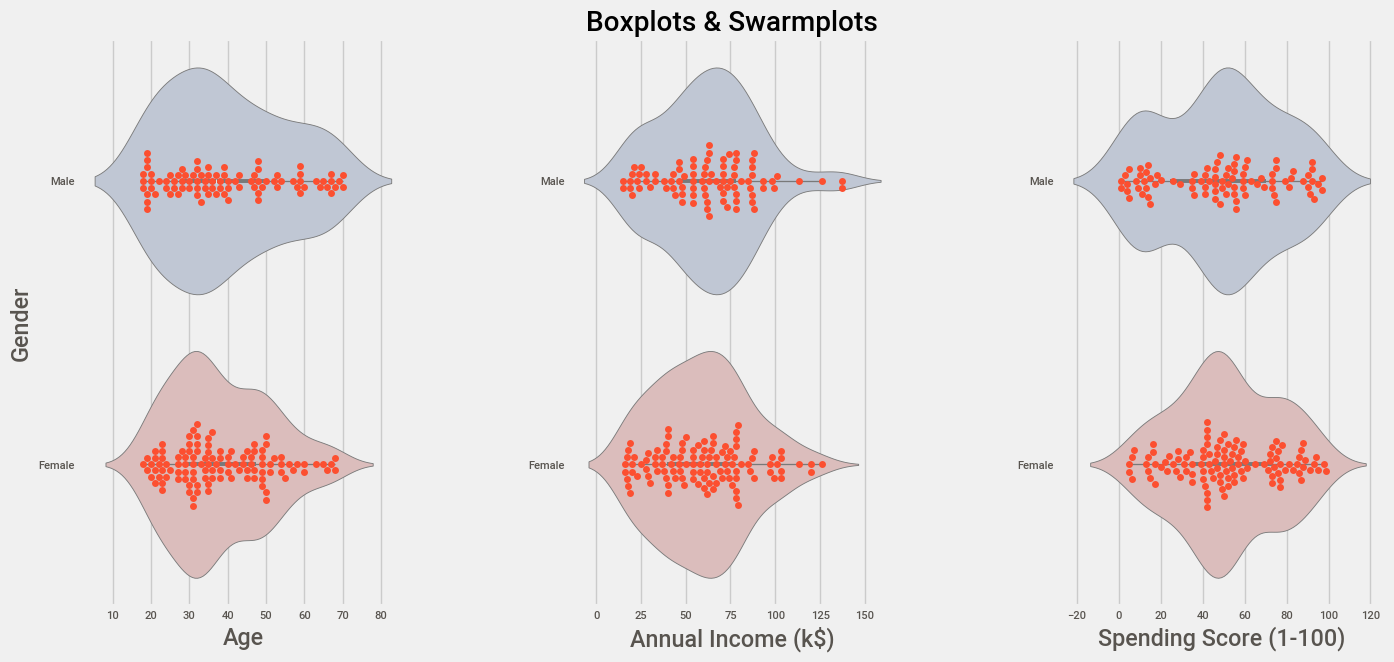

In [34]:
plt.figure(1 , figsize = (15 , 7))
n = 0
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

## Clustering using K- means
### 1.Segmentation using Age and Spending Score

In [35]:
'''Age and spending Score'''
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

### Selecting N Clusters based in Inertia (Squared Distance between Centroids and data points, should be less)

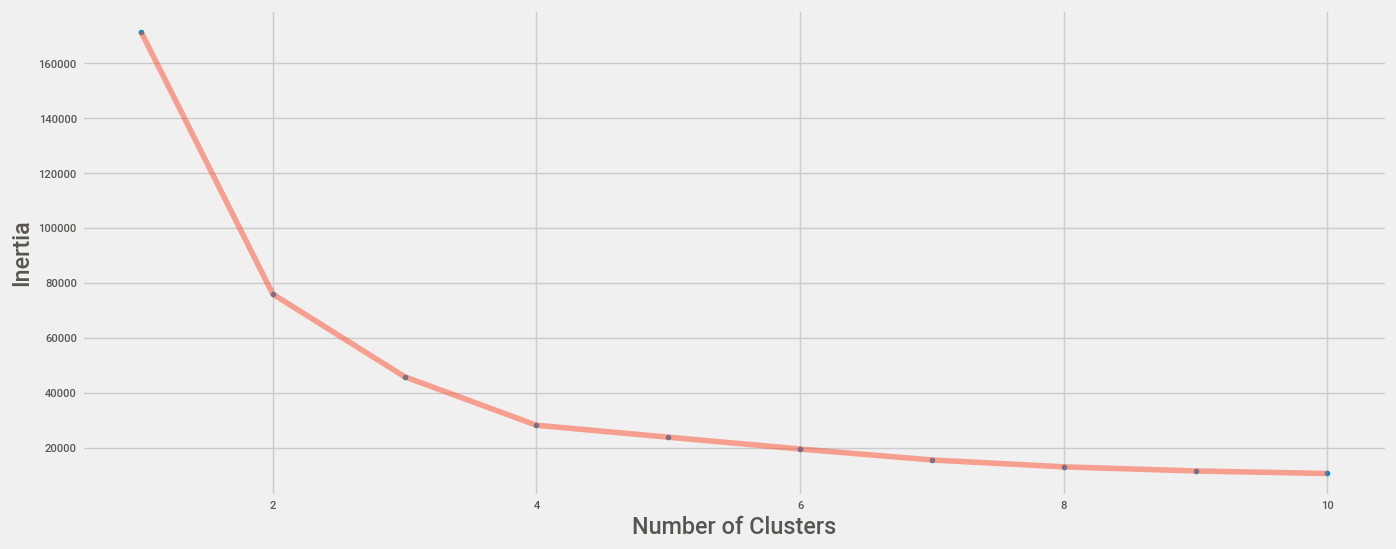

In [36]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [37]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [38]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

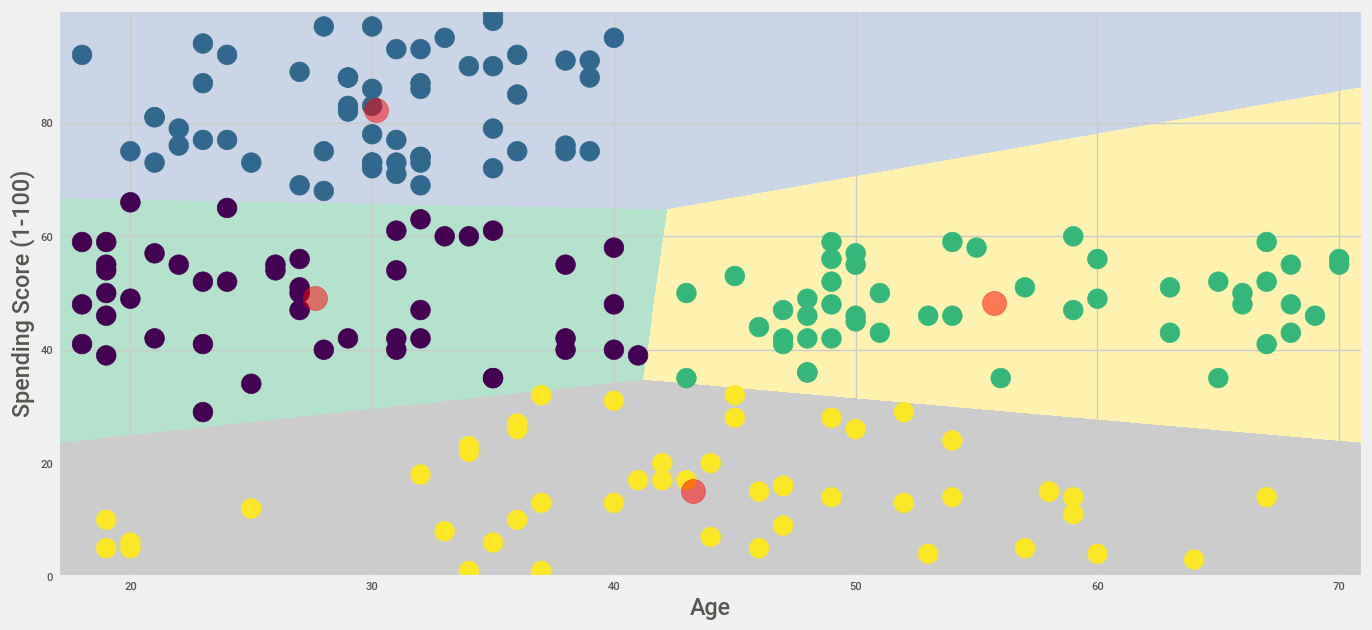

In [39]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels1 ,
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()